# Data Science - Module 4 - Final Project Submission

* Student Name: **James Toop**
* Student Pace: **Self Paced**
* Scheduled project review date/time: **Wednesday, 8th September 2021 - 9.30pm BST**
* Instructor name: **Jeff Herman**
* Blog post URL: **https://toopster.github.io**

## Table of Contents
1. [Business Case](#business-case)
2. [Exploratory Data Analysis](#eda)
    1. [Discovery](#data-discovery)
    2. [Preprocessing](#data-preprocessing)
3. [Deep Learning Neural Networks](#deep-learning-neural-networks)
    1. [Model 1: Create a baseline network](#model-1)
    2. [Model 2: Deepen the network and increase the number of neurons in each layer](#model-2)
    3. [Model 3: A deeper network but with a different activation type and reduce the number of neurons](#model-3)
    4. [Model 4: Adding some regularization and reducing the learning rate](#model-4)
    5. [Model 5: Adding a dropout layer and trying other optimizers with a reduced learning rate](#model-5)
    6. [Model 6: Building a CNN model](#model-6)

---
<a name="business-case"></a>
## 1. Project Purpose and Business Case

### 1A. What is Pneumonia?


Pneumonia is an acute respiratory infection affecting the tiny air sacs in the lungs, called alveoli. When a patient has pneumonia, these air sacs get swollen (inflamed) and fill with fluid making it harder for them to breathe, even painful, and limits oxygen intake.

<img src="diagram_lungs_pulmonary_fibrosis.png" title="Diagram of the Lungs" />

More people get pneumonia in winter. This is because respiratory viral infections that spread easily from person to person, such as flu, are more common in the winter, and these increase the risk of developing pneumonia. Most people with pneumonia can be completely cured. But it can be life-threatening particularly for people in "high risk" groups such as:

* babies and very young children
* elderly people
* people who smoke
* people with other health conditions, such as asthma, cystic fibrosis, or a heart, kidney or liver condition
* people with a weakened immune system – for example, as a result of a recent illness, such as flu, having HIV or AIDS, having chemotherapy, or taking medicine after an organ transplant

**According to the <a href="https://www.who.int/health-topics/pneumonia#tab=tab_1" target="_new">World Health Organisation</a>, pneumonia is the single largest infectious cause of death in children worldwide.**



### 1B. What causes Pneumonia?

Many kinds of bacteria and viruses can cause pneumonia including coronavirus (COVID-19).

---
<a name="eda"></a>
## 2. Exploratory Data Analysis (EDA)


In [1]:
# Import the relevant libraries
import os
import time
import matplotlib.pyplot as plt
%matplotlib inline

import scipy
from scipy import ndimage

import numpy as np
from PIL import Image

import keras
from keras import models
from keras import layers
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

Using TensorFlow backend.


<a name="data-discovery"></a>
### 2A. Data Discovery

This section presents an initial step to investigate, understand and document the available data fields and relationships, highlighting any potential issues / shortcomings within the datasets supplied.

#### Training Data

In [2]:
# Specify directory structure for images
train_folder = 'chest_xray/train/'
train_normal = 'chest_xray/train/NORMAL/'
train_pneumonia = 'chest_xray/train/PNEUMONIA/'

# Store all the relevant image names in specific objects
train_images_normal = [file for file in os.listdir(train_normal) if file.endswith('.jpeg')]
train_images_pneumonia = [file for file in os.listdir(train_pneumonia) if file.endswith('.jpeg')]

In [3]:
# Preview filenames for "normal" training images
train_images_normal[0:10]

['NORMAL2-IM-0927-0001.jpeg',
 'NORMAL2-IM-1056-0001.jpeg',
 'IM-0427-0001.jpeg',
 'NORMAL2-IM-1260-0001.jpeg',
 'IM-0656-0001-0001.jpeg',
 'IM-0561-0001.jpeg',
 'NORMAL2-IM-1110-0001.jpeg',
 'IM-0757-0001.jpeg',
 'NORMAL2-IM-1326-0001.jpeg',
 'NORMAL2-IM-0736-0001.jpeg']

In [4]:
# Preview filenames for "pneumonia" training images
train_images_pneumonia[0:10]

['person63_bacteria_306.jpeg',
 'person1438_bacteria_3721.jpeg',
 'person755_bacteria_2659.jpeg',
 'person478_virus_975.jpeg',
 'person661_bacteria_2553.jpeg',
 'person276_bacteria_1296.jpeg',
 'person1214_bacteria_3166.jpeg',
 'person1353_virus_2333.jpeg',
 'person26_bacteria_122.jpeg',
 'person124_virus_238.jpeg']

In [5]:
# Ascertain the size of the training dataset
print('Number of training chest x-ray images that are normal:', len(train_images_normal))
print('Number of training chest x-ray images that have pneumonia:', len(train_images_pneumonia))
print('\nTotal training chest x-ray images:', len(train_images_normal)+len(train_images_pneumonia))

Number of training chest x-ray images that are normal: 1341
Number of training chest x-ray images that have pneumonia: 3875

Total training chest x-ray images: 5216


#### Test Data

In [6]:
# Specify directory structure for images
test_folder = 'chest_xray/test/'
test_normal = 'chest_xray/test/NORMAL/'
test_pneumonia = 'chest_xray/test/PNEUMONIA/'

# Store all the relevant image names in specific objects
test_images_normal = [file for file in os.listdir(test_normal) if file.endswith('.jpeg')]
test_images_pneumonia = [file for file in os.listdir(test_pneumonia) if file.endswith('.jpeg')]

# Ascertain the size of the test dataset
print('Number of test chest x-ray images that are normal:', len(test_images_normal))
print('Number of test chest x-ray images that have pneumonia:', len(test_images_pneumonia))
print('\nTotal test chest x-ray images:', len(test_images_normal)+len(test_images_pneumonia))

Number of test chest x-ray images that are normal: 234
Number of test chest x-ray images that have pneumonia: 390

Total test chest x-ray images: 624


#### Validation Data

In [7]:
# Specify directory structure for images
val_folder = 'chest_xray/val/'
val_normal = 'chest_xray/val/NORMAL/'
val_pneumonia = 'chest_xray/val/PNEUMONIA/'

# Store all the relevant image names in specific objects
val_images_normal = [file for file in os.listdir(val_normal) if file.endswith('.jpeg')]
val_images_pneumonia = [file for file in os.listdir(val_pneumonia) if file.endswith('.jpeg')]

# Ascertain the size of the validation dataset
print('Number of validation chest x-ray images that are normal:', len(val_images_normal))
print('Number of validation chest x-ray images that have pneumonia:', len(val_images_pneumonia))
print('\nTotal validation chest x-ray images:', len(val_images_normal)+len(val_images_pneumonia))

Number of validation chest x-ray images that are normal: 8
Number of validation chest x-ray images that have pneumonia: 8

Total validation chest x-ray images: 16


<a name="data-preprocessing"></a>
### 2B. Preprocessing

In [8]:
# Get all the data in the directory chest_xrays/train (5216 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size = (128, 128), 
        batch_size = 5216)

# Get all the data in the directory chest_xrays/test (624 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size = (128, 128), 
        batch_size = 624) 

# Get all the data in the directory chest_xrays/validation (16 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size = (128, 128), 
        batch_size = 16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [9]:
# Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [10]:
# Explore the dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 5216
Number of testing samples: 624
Number of validation samples: 16
train_images shape: (5216, 128, 128, 3)
train_labels shape: (5216, 2)
test_images shape: (624, 128, 128, 3)
test_labels shape: (624, 2)
val_images shape: (16, 128, 128, 3)
val_labels shape: (16, 2)


In [11]:
# Preview the training labels
train_labels[:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [12]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(5216, 49152)
(624, 49152)
(16, 49152)


In [13]:
n_features = train_img.shape[1]
n_features

49152

In [83]:
train_y = np.reshape(train_labels[:,0], (5216,1))
test_y = np.reshape(test_labels[:,0], (624,1))
val_y = np.reshape(val_labels[:,0], (16,1))

In [82]:
train_y[:10]

array([[1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [16]:
# Function for visualising results
def visualize_results(results):
    history = results.history

    plt.figure(figsize=(20,8))
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    plt.subplot(1, 2, 1)
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['Validation Loss', 'Training Loss'], fontsize=12)
    plt.title('Loss', fontsize=18)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    
    plt.subplot(1, 2, 2)
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['Validation Accuracy', 'Training Accuracy'], fontsize=12)
    plt.title('Accuracy', fontsize=18)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Accuracy', fontsize=14)
    plt.show()

---
<a name="deep-learning-neural-networks"></a>
# 3. Deep Learning Neural Networks

<a name="model-1"></a>
### 3A. Model 1: Create a baseline network

In [84]:
np.random.seed(123)

# Build a baseline model
model_1 = models.Sequential()
model_1.add(layers.Dense(64, activation='tanh', input_shape=(n_features,)))
model_1.add(layers.Dense(2, activation='softmax'))

# View summary for model
model_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_38 (Dense)             (None, 64)                3145792   
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 130       
Total params: 3,145,922
Trainable params: 3,145,922
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Compile the baseline model
model_1.compile(loss='categorical_crossentropy', 
                optimizer='sgd', 
                metrics=['accuracy'])

In [88]:
# Fit the baseline model
results_1 = model_1.fit(train_img, 
                        train_labels, 
                        epochs=30, 
                        batch_size=64, 
                        validation_data=(test_img, test_labels))

Train on 5216 samples, validate on 624 samples
Epoch 1/30
5216/5216 [==============================] - 7s 1ms/step - loss: 0.9516 - acc: 0.7372 - val_loss: 0.7301 - val_acc: 0.6250
Epoch 2/30
5216/5216 [==============================] - 4s 752us/step - loss: 0.5085 - acc: 0.7383 - val_loss: 0.5897 - val_acc: 0.6250
Epoch 3/30
5216/5216 [==============================] - 4s 742us/step - loss: 0.4308 - acc: 0.8016 - val_loss: 0.4521 - val_acc: 0.7837
Epoch 4/30
5216/5216 [==============================] - 4s 742us/step - loss: 0.3703 - acc: 0.8386 - val_loss: 1.0372 - val_acc: 0.6250
Epoch 5/30
5216/5216 [==============================] - 4s 744us/step - loss: 0.3258 - acc: 0.8712 - val_loss: 0.5521 - val_acc: 0.7644
Epoch 6/30
5216/5216 [==============================] - 5s 921us/step - loss: 0.2550 - acc: 0.9022 - val_loss: 0.6799 - val_acc: 0.6506
Epoch 7/30
5216/5216 [==============================] - 4s 828us/step - loss: 0.2545 - acc: 0.9007 - val_loss: 1.0781 - val_acc: 0.6603
Epo

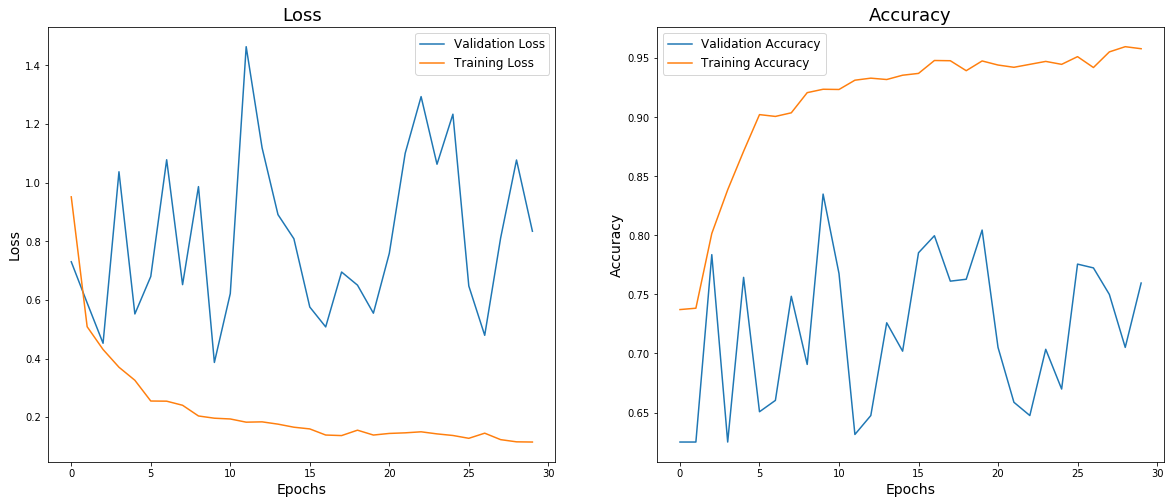

In [89]:
# Visualise the loss and accuracy of the training and validation sets across epochs
visualize_results(results_1)

In [90]:
# Evaluate the training results
results_1_train = model_1.evaluate(train_img, train_labels)
results_1_train

5216/5216 [==============================] - 2s 312us/step


[0.10221662206655266, 0.9626150306748467]

In [91]:
# Evaluate the test results
results_1_test = model_1.evaluate(test_img, test_labels)
results_1_test

624/624 [==============================] - 0s 397us/step


[0.8342596002114124, 0.7596153846153846]

<a name="model-2"></a>
### 3B. Model 2: Deepen the network and increase the number of neurons in each layer

In [23]:
np.random.seed(123)

# Build a deeper model
model_2 = models.Sequential()
model_2.add(layers.Dense(300, activation='tanh', input_shape=(n_features,)))
model_2.add(layers.Dense(100, activation='tanh'))
model_2.add(layers.Dense(2, activation='softmax'))

# View summary for model
model_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 300)               14745900  
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 202       
Total params: 14,776,202
Trainable params: 14,776,202
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Compile the deeper model
model_2.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

# Fit the deeper model
results_2 = model_2.fit(train_img, 
                        train_labels,
                        batch_size=64, 
                        epochs=30, 
                        validation_data=(test_img, test_labels))

Train on 5216 samples, validate on 624 samples
Epoch 1/30
5216/5216 [==============================] - 21s 4ms/step - loss: 0.6189 - acc: 0.7458 - val_loss: 0.4936 - val_acc: 0.7372
Epoch 2/30
5216/5216 [==============================] - 20s 4ms/step - loss: 0.4460 - acc: 0.7958 - val_loss: 0.5022 - val_acc: 0.7179
Epoch 3/30
5216/5216 [==============================] - 28s 5ms/step - loss: 0.3631 - acc: 0.8526 - val_loss: 0.3745 - val_acc: 0.8333
Epoch 4/30
5216/5216 [==============================] - 32s 6ms/step - loss: 0.3072 - acc: 0.8760 - val_loss: 0.5520 - val_acc: 0.7404
Epoch 5/30
5216/5216 [==============================] - 23s 4ms/step - loss: 0.2686 - acc: 0.8890 - val_loss: 0.4014 - val_acc: 0.7997
Epoch 6/30
5216/5216 [==============================] - 18s 4ms/step - loss: 0.2115 - acc: 0.9153 - val_loss: 0.3573 - val_acc: 0.8301
Epoch 7/30
5216/5216 [==============================] - 18s 4ms/step - loss: 0.2484 - acc: 0.9022 - val_loss: 1.3857 - val_acc: 0.6346
Epoch 8/

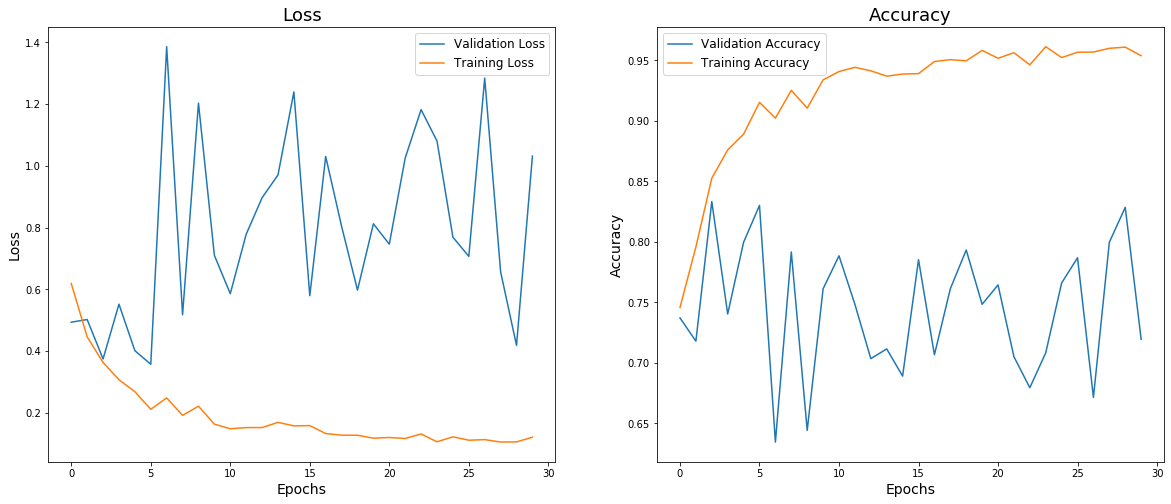

In [25]:
# Visualise the loss and accuracy of the training and validation sets across epochs
visualize_results(results_2)

In [26]:
# Evaluate the training results
results_2_train = model_2.evaluate(train_img, train_labels)
results_2_train

5216/5216 [==============================] - 7s 1ms/step


[0.1036037773013892, 0.9591641104294478]

In [27]:
# Evaluate the test results
results_2_test = model_2.evaluate(test_img, test_labels)
results_2_test

624/624 [==============================] - 1s 1ms/step


[1.0313680997261634, 0.719551282051282]

<a name="model-3"></a>
### 3C. Model 3: A deeper network but with a different activation type and reduce the number of neurons

In [28]:
np.random.seed(123)

# Build a deeper model with less neurons and change activation type
model_3 = models.Sequential()
model_3.add(layers.Dense(64, activation='relu', input_shape=(n_features,)))
model_3.add(layers.Dense(32, activation='relu'))
model_3.add(layers.Dense(16, activation='relu'))
model_3.add(layers.Dense(2, activation='softmax'))

model_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                3145792   
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 34        
Total params: 3,148,434
Trainable params: 3,148,434
Non-trainable params: 0
_________________________________________________________________


In [29]:
# Compile model
model_3.compile(loss='categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

# Fit model
results_3 = model_3.fit(train_img, 
                        train_labels,
                        batch_size=64, 
                        epochs=30, 
                        validation_data=(test_img, test_labels))

Train on 5216 samples, validate on 624 samples
Epoch 1/30
5216/5216 [==============================] - 7s 1ms/step - loss: 0.5256 - acc: 0.7500 - val_loss: 1.1635 - val_acc: 0.6250
Epoch 2/30
5216/5216 [==============================] - 7s 1ms/step - loss: 0.4305 - acc: 0.8227 - val_loss: 0.4568 - val_acc: 0.8061
Epoch 3/30
5216/5216 [==============================] - 7s 1ms/step - loss: 0.3401 - acc: 0.8604 - val_loss: 0.5100 - val_acc: 0.7580
Epoch 4/30
5216/5216 [==============================] - 6s 1ms/step - loss: 0.2744 - acc: 0.8886 - val_loss: 0.6776 - val_acc: 0.7212
Epoch 5/30
5216/5216 [==============================] - 6s 1ms/step - loss: 0.2732 - acc: 0.9022 - val_loss: 0.7547 - val_acc: 0.7019
Epoch 6/30
5216/5216 [==============================] - 5s 999us/step - loss: 0.2235 - acc: 0.9080 - val_loss: 0.6678 - val_acc: 0.7308
Epoch 7/30
5216/5216 [==============================] - 5s 1ms/step - loss: 0.2063 - acc: 0.9166 - val_loss: 1.4022 - val_acc: 0.6298
Epoch 8/30
52

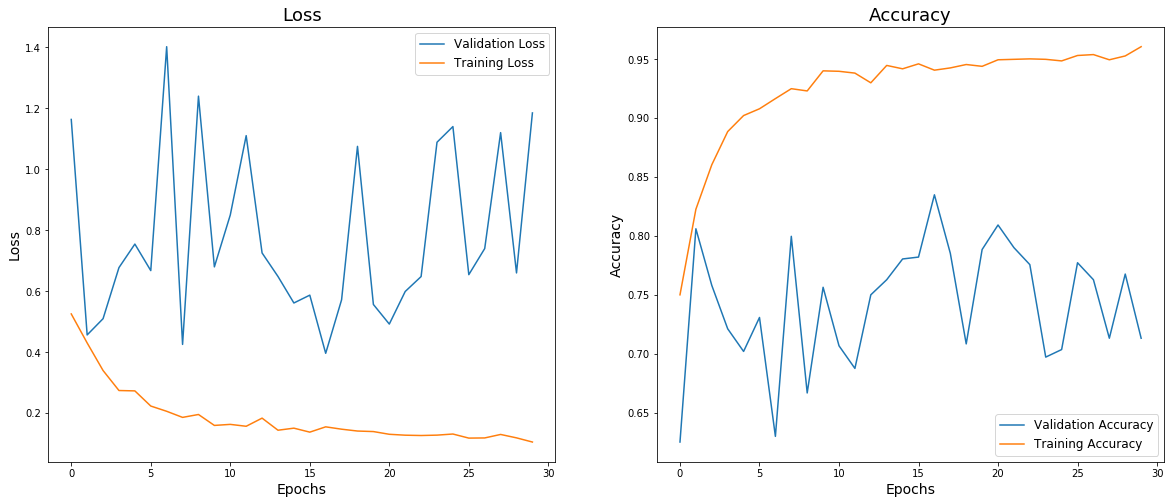

In [30]:
# Visualise the loss and accuracy of the training and validation sets across epochs
visualize_results(results_3)

In [31]:
# Evaluate the training results
results_3_train = model_3.evaluate(train_img, train_labels)
results_3_train

5216/5216 [==============================] - 3s 542us/step


[0.12075051142794131, 0.9559049079754601]

In [32]:
# Evaluate the test results
results_3_test = model_3.evaluate(test_img, test_labels)
results_3_test

624/624 [==============================] - 0s 612us/step


[1.184930349007631, 0.7131410256410257]

<a name="model-4"></a>
### 3D. Model 4: Adding some regularization and reducing the learning rate

In [114]:
np.random.seed(123)

# Build the model
model_4 = models.Sequential()
model_4.add(layers.Dense(64, activation='relu', input_shape=(n_features,)))
model_4.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model_4.add(layers.Dense(2, activation='softmax'))

# View summary for model
model_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 64)                3145792   
_________________________________________________________________
dense_53 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_54 (Dense)             (None, 2)                 66        
Total params: 3,147,938
Trainable params: 3,147,938
Non-trainable params: 0
_________________________________________________________________


In [115]:
optimizer = keras.optimizers.SGD(0.0001)

# Compile model
model_4.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

# Fit model
results_4 = model_4.fit(train_img, 
                        train_labels,
                        batch_size=64, 
                        epochs=30, 
                        validation_data=(test_img, test_labels))

Train on 5216 samples, validate on 624 samples
Epoch 1/30
5216/5216 [==============================] - 8s 1ms/step - loss: 0.7232 - acc: 0.7444 - val_loss: 0.8367 - val_acc: 0.6250
Epoch 2/30
5216/5216 [==============================] - 4s 819us/step - loss: 0.6662 - acc: 0.7632 - val_loss: 0.7744 - val_acc: 0.6458
Epoch 3/30
5216/5216 [==============================] - 4s 819us/step - loss: 0.6278 - acc: 0.8031 - val_loss: 0.7685 - val_acc: 0.6490
Epoch 4/30
5216/5216 [==============================] - 4s 847us/step - loss: 0.5980 - acc: 0.8340 - val_loss: 0.7688 - val_acc: 0.6538
Epoch 5/30
5216/5216 [==============================] - 4s 736us/step - loss: 0.5747 - acc: 0.8526 - val_loss: 0.7246 - val_acc: 0.7019
Epoch 6/30
5216/5216 [==============================] - 4s 752us/step - loss: 0.5550 - acc: 0.8710 - val_loss: 0.7122 - val_acc: 0.7228
Epoch 7/30
5216/5216 [==============================] - 4s 743us/step - loss: 0.5388 - acc: 0.8819 - val_loss: 0.6926 - val_acc: 0.7484
Epo

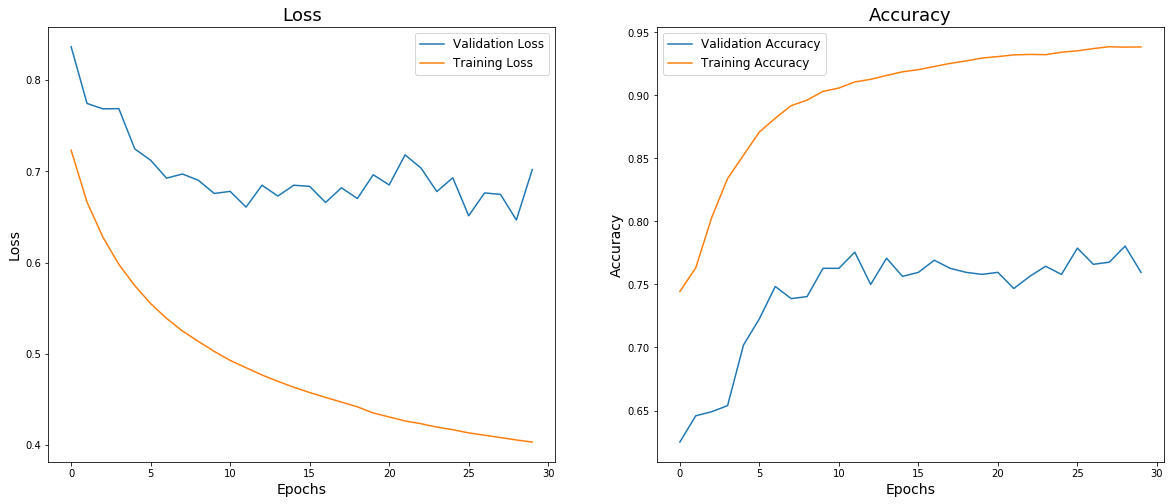

In [116]:
# Visualise the loss and accuracy of the training and validation sets across epochs
visualize_results(results_4)

In [117]:
# Evaluate the training results
results_4_train = model_4.evaluate(train_img, train_labels)
results_4_train

5216/5216 [==============================] - 2s 353us/step


[0.4013468994319073, 0.9369248466257669]

In [118]:
# Evaluate the training results
results_4_test = model_4.evaluate(test_img, test_labels)
results_4_test

624/624 [==============================] - 0s 367us/step


[0.7019909039521829, 0.7596153846153846]

<a name="model-5"></a>
### 3E. Model 5: Adding a dropout layer and trying other optimizers with a reduced learning rate

In [105]:
np.random.seed(123)

# Build the model
model_5 = models.Sequential()
model_5.add(layers.Dropout(0.3, input_shape=(n_features,)))
model_5.add(layers.Dense(64, activation='relu'))
model_5.add(layers.Dropout(0.3))
model_5.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.005), activation='relu'))
model_5.add(layers.Dropout(0.3))
model_5.add(layers.Dense(2, activation='softmax'))

# View summary for model
model_5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_12 (Dropout)         (None, 49152)             0         
_________________________________________________________________
dense_49 (Dense)             (None, 64)                3145792   
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 66        
Total params: 3,147,938
Trainable params: 3,147,938
Non-trainable params: 0
_________________________________________________________________


In [106]:
optimizer = keras.optimizers.Adam(0.0001)

# Compile model
model_5.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

# Fit model
results_5 = model_5.fit(train_img, 
                        train_labels,
                        batch_size=64, 
                        epochs=30, 
                        validation_data=(test_img, test_labels))

Train on 5216 samples, validate on 624 samples
Epoch 1/30
5216/5216 [==============================] - 10s 2ms/step - loss: 0.7065 - acc: 0.7713 - val_loss: 0.8172 - val_acc: 0.6506
Epoch 2/30
5216/5216 [==============================] - 9s 2ms/step - loss: 0.5322 - acc: 0.8531 - val_loss: 0.6740 - val_acc: 0.7548
Epoch 3/30
5216/5216 [==============================] - 8s 2ms/step - loss: 0.4856 - acc: 0.8679 - val_loss: 0.6828 - val_acc: 0.7532
Epoch 4/30
5216/5216 [==============================] - 8s 2ms/step - loss: 0.4316 - acc: 0.8923 - val_loss: 0.6293 - val_acc: 0.7965
Epoch 5/30
5216/5216 [==============================] - 8s 2ms/step - loss: 0.4014 - acc: 0.8986 - val_loss: 0.7263 - val_acc: 0.7660
Epoch 6/30
5216/5216 [==============================] - 8s 2ms/step - loss: 0.3776 - acc: 0.9039 - val_loss: 0.7032 - val_acc: 0.7420
Epoch 7/30
5216/5216 [==============================] - 8s 2ms/step - loss: 0.3623 - acc: 0.9147 - val_loss: 0.7426 - val_acc: 0.7692
Epoch 8/30
521

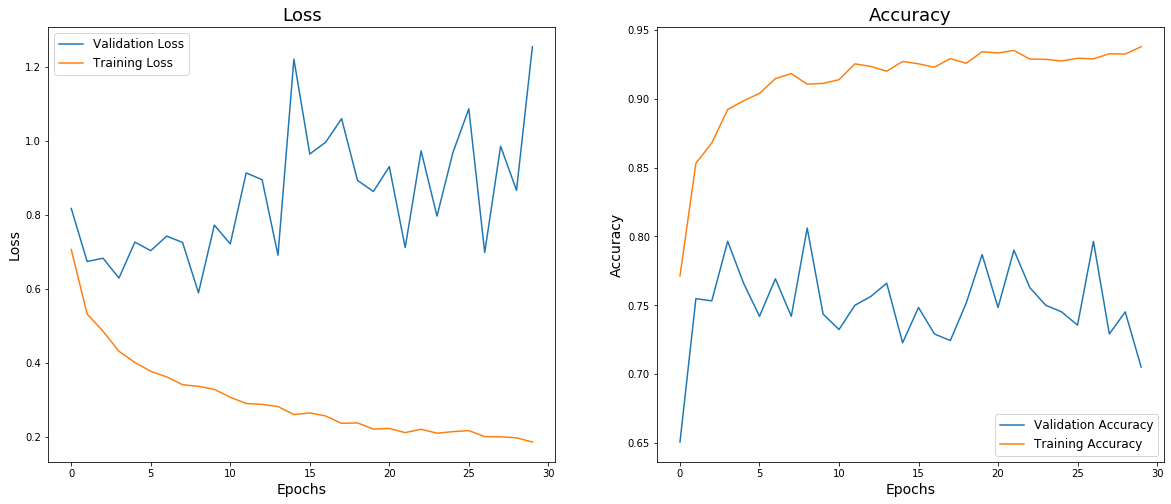

In [108]:
# Visualise the loss and accuracy of the training and validation sets across epochs
visualize_results(results_5)

In [101]:
# Evaluate the training results
results_5_train = model_5.evaluate(train_img, train_labels)
results_5_train

5216/5216 [==============================] - 2s 336us/step


[0.2860472497581704, 0.9583972392638037]

In [102]:
# Evaluate the training results
results_5_test = model_5.evaluate(test_img, test_labels)
results_5_test

624/624 [==============================] - 0s 381us/step


[0.925787247144259, 0.7596153846153846]

<a name="model-6"></a>
### 3F. Model 6: Building a CNN model

In [127]:
model_6 = models.Sequential()
model_6.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model_6.add(layers.MaxPooling2D((2, 2)))

model_6.add(layers.Conv2D(32, (4, 4), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))

model_6.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_6.add(layers.MaxPooling2D((2, 2)))

model_6.add(layers.Flatten())
model_6.add(layers.Dense(64, activation='relu'))
model_6.add(layers.Dense(1, activation='sigmoid'))

model_6.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

results_6 = model_6.fit(train_images,
                        train_y,
                        epochs=30,
                        batch_size=32,
                        validation_data=(test_images, test_y))

Train on 5216 samples, validate on 624 samples
Epoch 1/30
5216/5216 [==============================] - 151s 29ms/step - loss: 0.5419 - acc: 0.7488 - val_loss: 1.0865 - val_acc: 0.6250
Epoch 2/30
5216/5216 [==============================] - 141s 27ms/step - loss: 0.4170 - acc: 0.8219 - val_loss: 1.1406 - val_acc: 0.6250
Epoch 3/30
5216/5216 [==============================] - 140s 27ms/step - loss: 0.2895 - acc: 0.8838 - val_loss: 0.3641 - val_acc: 0.8381
Epoch 4/30
5216/5216 [==============================] - 137s 26ms/step - loss: 0.2193 - acc: 0.9084 - val_loss: 0.7461 - val_acc: 0.7244
Epoch 5/30
5216/5216 [==============================] - 141s 27ms/step - loss: 0.1900 - acc: 0.9254 - val_loss: 0.3796 - val_acc: 0.8349
Epoch 6/30
5216/5216 [==============================] - 143s 27ms/step - loss: 0.1675 - acc: 0.9346 - val_loss: 0.7399 - val_acc: 0.7452
Epoch 7/30
5216/5216 [==============================] - 157s 30ms/step - loss: 0.1536 - acc: 0.9375 - val_loss: 0.4640 - val_acc: 0

<a name="model-X"></a>
### 3X. Model X

In [ ]:
# Build a baseline fully connected model

model_X = models.Sequential()
model_X.add(layers.Dense(20, activation='relu', input_shape=(n_features,))) # 2 hidden layers
model_X.add(layers.Dense(7, activation='relu'))
model_X.add(layers.Dense(5, activation='relu'))
model_X.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model_X.compile(loss='binary_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

In [ ]:
results_X = model_X.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

In [ ]:
visualize_results(results_X)

In [ ]:
results_X_train = model_X.evaluate(train_img, train_y)
results_X_train

In [ ]:
results_X_test = model_X.evaluate(test_img, test_y)
results_X_test